In [1]:
import sys
import os
from dotenv import load_dotenv

sys.path.append(os.path.abspath('/workspaces/spotify-churn-analysis/src'))
load_dotenv(dotenv_path="/workspaces/spotify-churn-analysis/src/data.env")

from db_connection import load_view


In [2]:
df_m = load_view("user_metrics")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   object 
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   bool   
 11  is_churned             8000 non-null   bool   
dtypes: bool(2), float64(1), int64(4), object(5)
memory usage: 640.8+ KB


In [5]:
df_m.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,8000.0,37.66,12.74,16.0,26.00,38.0,49.00,59.0
listening_time,8000.0,154.07,84.02,10.0,81.00,154.0,227.00,299.0
songs_played_per_day,8000.0,50.13,28.45,1.0,25.00,50.0,75.00,99.0
skip_rate,8000.0,0.30,0.17,0.0,0.15,0.3,0.45,0.6
ads_listened_per_week,8000.0,6.94,13.62,0.0,0.00,0.0,5.00,49.0


Divide customers into age groups

In [6]:
df_m['age_group'] = pd.cut(df_m['age'], bins=[0,18,60,100], labels=['Young','Adult','Senior'])

In [7]:
df_m['age_group'].value_counts()

age_group
Adult     7466
Young      534
Senior       0
Name: count, dtype: int64

In [8]:
df_s = load_view("subscription_churn_stats")
df_d = load_view("device_churn_stats")

In [9]:
df_s

,subscription_type,total_users,avg_ads_per_week,avg_skip_rate,avg_listening_time,avg_songs_played,churn_rate
0,Family,1908,0.00000,0.300325,151.041405,50.383124,27.52
1,Student,1959,0.00000,0.302945,154.489025,51.241960,26.19
2,Premium,2115,0.00000,0.296582,155.522931,49.744681,25.06
3,Free,2018,27.52775,0.300922,154.997027,49.204163,24.93


<Axes: xlabel='subscription_type', ylabel='avg_listening_time'>

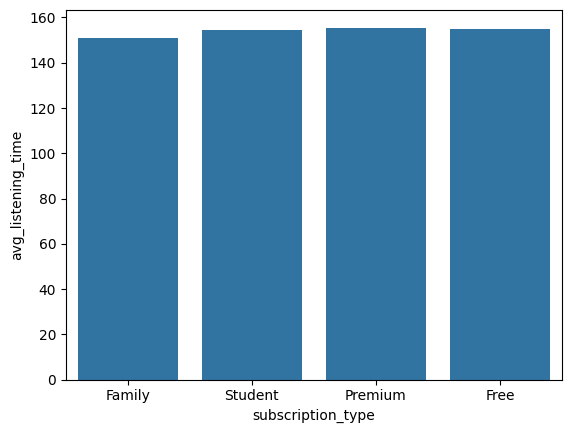

In [10]:
sns.barplot(data=df_s, x='subscription_type', y='avg_listening_time')

<Axes: xlabel='subscription_type', ylabel='churn_rate'>

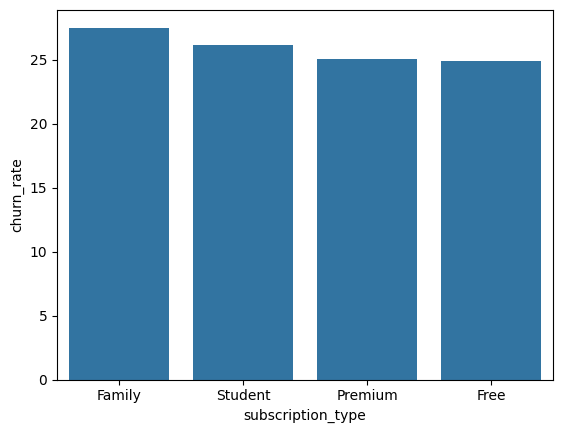

In [11]:
sns.barplot(data=df_s, x='subscription_type', y='churn_rate')

Zomm to focus on differences in churn rate

(23.93, 28.52)

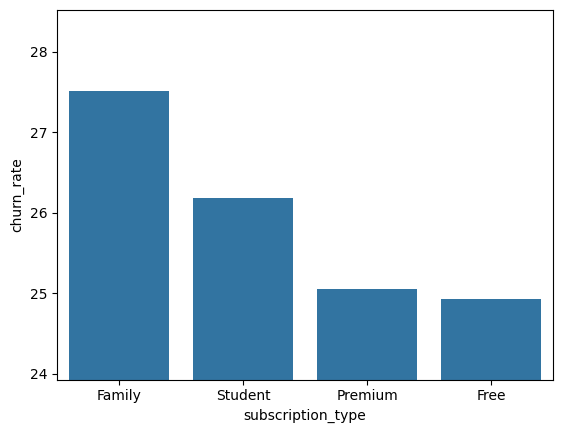

In [12]:
sns.barplot(data=df_s, x='subscription_type', y='churn_rate')
plt.ylim(df_s['churn_rate'].min() - 1, df_s['churn_rate'].max() + 1)

([<matplotlib.patches.Wedge at 0x742abd028c50>,
 [Text(0.5111651012141392, 0.9740175764845002, 'Mobile'),
  Text(-1.0969557249200423, -0.0817810342631148, 'Desktop'),
  Text(0.5821656620447359, -0.9333183497264022, 'Web')],
 [Text(0.2788173279349849, 0.531282314446091, '34.6%'),
  Text(-0.598339486320023, -0.04460783687078989, '33.1%'),
  Text(0.31754490656985584, -0.5090827362144011, '32.2%')])

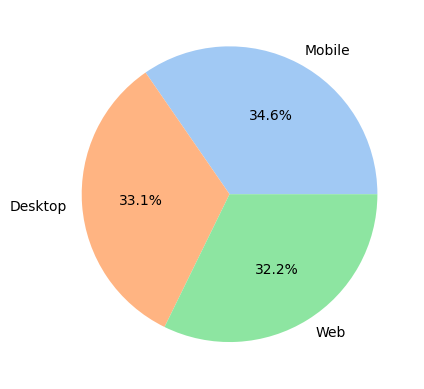

In [32]:
plt.pie(
    df_d['churn_rate'],
    labels=df_d['device_type'],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel')
)

Chart of the number of users by subscription type, along with the total number of users

In [38]:
values = df_s['total_users']
labels = df_s['subscription_type']

Text(0, 0, '8000\nusers')

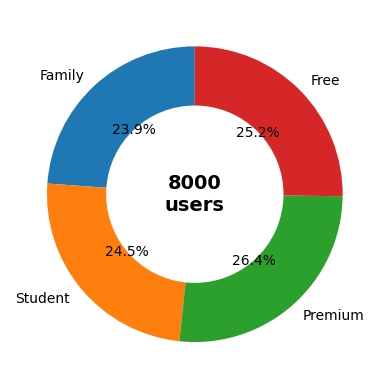

In [39]:
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4)
)

total_users = df_s['total_users'].sum() 
ax.text(0, 0, f"{total_users}\nusers", ha='center', va='center', fontsize=14, fontweight='bold')